# Example Notebook: Payment Optimization 

Businesses can use our package to optimize their payment processes, identifying inefficiencies and streamlining transactions to enhance overall efficiency and reduce costs.

We will use historical transaction data to analyze the effectiveness of different payment methods. We'll compare the average transaction values for each payment method to identify the most effective one.

This notebook demonstrates two scenarios where the payment optimization solution is applied effectively.

## Initializing Schema and Generating Synthetic Data for Example demonstation

In [13]:
from payment_optimizer.db.schema import *
from payment_optimizer.db.csv_files_creator import *
from payment_optimizer.db.sql_interactions import *

## Importing the Required pacages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from payment_optimizer.modeling.models import DatabaseConnector, ABTesting

## Instantiate the ABTesting class and getting the data in the required format.

Setting up database connection


In [ ]:
db_path = "e_commerce"
data_connect = DatabaseConnector(db_path)
data_connect.join_tables()

Specifying senario cases

In [22]:
senario_cases = [
        {"name": "Default A/B Test", "start_date": None, "end_date": None},
        {"name": "A/B Test with Start Date", "start_date": "04/07/2022", "end_date": None},
        {"name": "A/B Test with Start and End Date", "start_date": "04/02/2022", "end_date": "30/04/2023"}
    ]

Initializing ABTesting object for the case with start and end date specification for different senarios.
Getting A/B test results and visualizing them.

In [26]:
results = []
for case in senario_cases:
    ab_test = ABTesting(data_connect)
    ab_test.preprocess_data()
    ab_test.perform_ab_test(case["start_date"], case["end_date"])
    results.append(ab_test.get_results())


Showing the test results 

In [27]:
a_b_testing_results = pd.DataFrame(results)
a_b_testing_results['result_id'] = range(1, len(a_b_testing_results) + 1)
print(a_b_testing_results)

  start_date   end_date  t_test_AB  p_value_AB  \
0        NaT        NaT  -1.346957    0.089061   
1 2022-07-04        NaT  -1.511058    0.065473   
2 2022-02-04 2023-04-30  -1.335498    0.090974   

                               message_AB_comparison  t_test_BC  p_value_BC  \
0  Fail to reject the null hypothesis. There is n...  -3.652421    0.000133   
1  Fail to reject the null hypothesis. There is n...  -3.565802    0.000187   
2  Fail to reject the null hypothesis. There is n...  -3.902335    0.000051   

                               message_BC_comparison  \
0  Reject the null hypothesis. There is sufficien...   
1  Reject the null hypothesis. There is sufficien...   
2  Reject the null hypothesis. There is sufficien...   

                   test_date  result_id  
0 2024-05-12 05:22:14.100627          1  
1 2024-05-12 05:22:14.152040          2  
2 2024-05-12 05:22:14.222344          3  


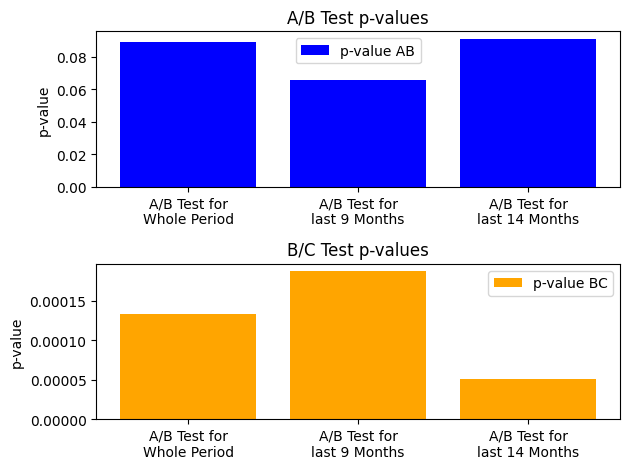

In [36]:
import matplotlib.pyplot as plt

# Setting the descriptions for labeling
descriptions = ["A/B Test for\nWhole Period", "A/B Test for\nlast 9 Months", "A/B Test for\nlast 14 Months"]

# Plot p-values for AB test
plt.subplot(2, 1, 1)
plt.bar(range(len(descriptions)), a_b_testing_results['p_value_AB'], color='blue', label='p-value AB')
plt.title('A/B Test p-values')
plt.ylabel('p-value')
plt.xticks(range(len(descriptions)), descriptions)
plt.legend()

# Plot p-values for BC test
plt.subplot(2, 1, 2)
plt.bar(range(len(descriptions)), a_b_testing_results['p_value_BC'], color='orange', label='p-value BC')
plt.title('B/C Test p-values')
plt.ylabel('p-value')
plt.xticks(range(len(descriptions)), descriptions)
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
